## Part 2 - DonorsChoose.org Machine Learning ##
In this **Machine Learning** part of the project, we will be developing predictive models. These models will predict if the application of project proposal to **DonorsChoose.org** is approved to be posted on the **DonorsChoose.org** website or not. We will also compare the models try to figure out which model has the better performace.<br>
There are two steps involved in this part.
   * __1) Feature Engineering:__Feature engineering is one of the most important and tricky process in machine learning. With the dataset we have numerical, categorical and text data. We will create some features with text data available in different files and columns and convert them into numerical values, categorical data will be engineered into numerical values as well. 
   * __2) Modeling:__ Once we are done with the feature engineering part the modeling will be much easier. We will choose one model from each of the **Linear, Naive Bayes and Decision Trees models** for classification. We will evaluate these models and comapre the models on their performance.

We will come across some important terms and definitions through out this notebook. We will try to define and explain all the important terms and will post the link wherever needed. 

### Terms and Definitions ###
**Imbalanced Dataset:** One of two classes is much more frequent then the other one. This is very common in practice; a good example for this is click-through prediction, where each data point represents an “impression”, an item that was shown to a user. This item might be an add, or a related story, or a related person to follow on a social media site. The goal is to predict whether, if shown a particular item, a user will click on it (indicating they are interested). Most thing users are shown on the internet (in particular, ads) will not result in a click. You might need to show a user 100 ads or articles before they find something interesting enough to click on. This results in a dataset where for each 99 “no click” data points, there is 1 “clicked” data point; in other words, 99% of the samples belong to the “no click” class. Datasets in which one class is much more frequent than the other are often called imbalanced dataset, or datasets with imbalanced classes. In our case most frequent class would be **project_is_approved(1).**

There are  few techniques to handle the imbalanced data like:<br>
 1) Up-sample the minority class<br>
 2) Down-sample the majority class<br>
 3) Change your performance metric<br>
 4) Penalize algorithms (cost-sensitive training)<br>
 5) Use tree-based algorithms<br>
 6) SMOTE - Synthetic Minority Oversampling TEchnique (SMOTE)<br>
We will be using the last one SMOTE. A very good detail explanation about the SMOTE has been given on the link https://www.jair.org/media/953/live-953-2037-jair.pdf
    
A very flexible strategy for cross validation is **shuffle-split cross-validation**. In shuffle-split cross-validation, each split samples train_size many points for the training set, and test_size many (disjoint) point for the test set. This splitting is repeated n_iter many times. Shuffle-split cross-validation allows for control over the the number of iterations independently of the training and test sizes, which can sometimes be helpful. It also allows for using only part of the data in each iteration, by providing train_size and test_size settings that don’t add up to one. Subsampling the data in this way can be useful for experimenting with large datasets. There is also a stratified variant of ShuffleSplit, aptly named **StratifiedShuffleSplit**, which can provide more reliable results for classification tasks.

We cannot choose accuracy of the model as a performance measure for the **Binary Classification**. This Depends on application by application. For example imagine an application to screen for the early detection of cancer using an automated test. If the test is negative, the patient will be assumed healthy, while if the test is positive, the patient will undergo additional screening. Here, we would call a positive test (indication of cancer) the positive class, and a negative test the negative class. We can’t assume that our model will always work perfectly, and it will make mistakes. For any application, we need to ask ourselves what the consequence of these mistakes are in the real world. One possible mistake is that a healthy patient will be classified as positive, leading to additional testing. This leads to some costs and a slight inconvenience for the patient. Making an incorrect positive prediction is called a false positive. The other possible mistake is that a sick patient will be classified as negative, and will not receive further tests and treatment. The undiagnosed cancer might lead to serious health issues, and could even be fatal. Making a mistake of this kind, an incorrect negative prediction is called a false negative. In this particular example, it is clear that we want to avoid false negatives as much as possible, while false positives just create a minor nuisance. While this is a particularly drastic example, the consequence of false positives and false negatives are rarely the same. In commercial applications, it might be possible to assign dollar values to both kinds of mistakes, which would allow measuring the error of a particular prediction in dollars, instead of accuracy - which might be much more meaningful for making business decisions on which model to use.

There are some good matrices which are used to measure the performaance of the classification problems. We will define those matrices.

**Confusion matrices**<br>
One of the most comprehensive ways to represent the result of evaluating binary classification is using confusion matrices. The output of confusion_matrix is a two by two array, where the rows correspond to the true classes, and the columns corresponds to the predicted classes. Each entry counts for how many data points in the class given by the row the prediction was the class given by the column.

**Precision**<br>
Precision is used as a performance metric when the goal is to limit the number of false positives. As an example, imagine a model to predict whether a new drug will be effective in treating a disease in clinical trials. Clinical trials are notoriously expensive, and a pharmaceutical company will only want to run an experiment if it is very sure
that the predicted drugs will actually work. Therefore, it is important that the model does not produce many false positives, in other words, it has a high precision. Precision is also know as positive predictive value (PPV).

**Recall**<br>
Recall is used as performance metric when we need to identify all positive samples, that is when it is important to avoid false negatives. The cancer diagnosis example from the Section “Kinds of Errors” is a good example for this: it is important to find all people that are sick, possible including healthy patients in the prediction. Other
names for recall are sensitivity, hit rate or true positive rate (TPR).

**Note:** Precision and Recall are inversely proportional to each other. High precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.

**f1-Score**<br>
So while precision and recall are very important measures, looking at only one of them will not provide you with the full picture. One way to summarize them is the fscore or f-measure, which is the harmonic mean of precision and recall.

If we want a more comprehensive summary of precision, recall and f1 score, we can use the **classification_report** convenience function to compute all three at once, and print them in a nice format.

The confusion matrix and the classification report provide a very detailed analysis of a particular set of predictions. However, the predictions themselves already threw away a lot of information that is contained in the model. Most classifiers provide a __*decision_function*__ or a __*predict_proba*__ method to assess degrees of certainty about predictions. Making predictions can be seen as thresholding the output of decision_function or
predict_proba at a certain fixed point - in binary classification zero for the decision function and 0.5 for predict_proba.

**Precision-Recall curves and ROC curves**<br>
Setting a requirement on a classifier like 90% recall is often called the operating point. Fixing an operating point is often helpful in business settings to make performance guarantees to customer or other groups inside your organization. Often, when developing a new model, it is not entirely clear what the operating point will be. For this reason, and to understand a modeling problem better, it is instructive to look at all possible thresholds, or all possible trade-offs of precision and recall at once. This is possible using a tool called the **precision-recall curve** or **PR-Curve**. The precision_recall_curve function returns a list of precision and recall values for all possible thresholds (all values that appear in the decision function) in sorted order.<br>
There is another tool commonly used to analyze the behavior of classifiers at different thresholds: the **receiver operating characteristics curve**, or **ROC curve** for short. The ROC curve similarly considers all possible thresholds for a given classifier, but instead of reporting precision and recall, it shows the false positive rate FPR against the true positive rate TPR. Recall that the true positive rate is simply another name for recall, while the false positive rate is the fraction of false positives out of all negative samples.

For more information on Precision and Recall please follow the below link.<br>
https://en.wikipedia.org/wiki/Precision_and_recall

Let's start by loading some libraries.

In [3]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# other miscellaneous libralies.
from scipy.sparse import hstack, vstack, csr_matrix
from sklearn.preprocessing import LabelEncoder
import warnings

# Text feature engineering.
import re    
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Modeling related libraries
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report, average_precision_score, f1_score
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

In [4]:
# setup the pandas to display all the columns of the dataframe.
pd.set_option('display.max_columns', None)

# igonre warning settings
warnings.filterwarnings('ignore')

Now load the training and test data into 2 dataframes and remeber to use date_parser option set to column 'project_submitted_datetime' columns so that this can be used later when we derive features related to date column.

In [5]:
# read the train and test dataset from csv file into dataframe: df_train, df_test
df_train = pd.read_csv('train.csv', date_parser='project_submitted_datetime',
                       dtype={"project_essay_3": object, "project_essay_4": object})
df_test = pd.read_csv('test.csv', date_parser='project_submitted_datetime', 
                     dtype={"project_essay_3": object, "project_essay_4": object})

# read the resources file into dataframe: df_resources
df_resources = pd.read_csv('resources.csv')

In [6]:
# create a new dataframe with only target values: df_target
df_target = df_train['project_is_approved']

# drop the target column from training dataset.
df_train = df_train.drop('project_is_approved', axis=1)

**Remember** the test files(test.csv) doesn't have the column *"project_is_approved"*. <br>
From here onwards we will do all the steps in feature engineering on both the dataframes **train** and **test**, as test will have to be in the same format as of train to be used in the model for prediction.

In [7]:
# check for null values in train dataset
df_train.isnull().any()

id                                              False
teacher_id                                      False
teacher_prefix                                   True
school_state                                    False
project_submitted_datetime                      False
project_grade_category                          False
project_subject_categories                      False
project_subject_subcategories                   False
project_title                                   False
project_essay_1                                 False
project_essay_2                                 False
project_essay_3                                  True
project_essay_4                                  True
project_resource_summary                        False
teacher_number_of_previously_posted_projects    False
dtype: bool

In [8]:
# check for null values in test dataset
df_test.isnull().any()

id                                              False
teacher_id                                      False
teacher_prefix                                   True
school_state                                    False
project_submitted_datetime                      False
project_grade_category                          False
project_subject_categories                      False
project_subject_subcategories                   False
project_title                                   False
project_essay_1                                 False
project_essay_2                                 False
project_essay_3                                  True
project_essay_4                                  True
project_resource_summary                        False
teacher_number_of_previously_posted_projects    False
dtype: bool

From **EDA** part of this project we know the following:
* missing values in *teacher_prefix* column of training and test dataset can be filled with _Teacher_. 
* missing values in columns *project_essay_3* and *project_essay_4* of training and test dataset can be filled with *" "(blank space)*.
* missing values in columns _description_ of resource dataset can be filled with *" "(blank space)*.<br>

We will be handling those missing values accordingly when we need it. First will handle the missing values of train and test dataset.

In [9]:
# train dataset columns with NaN values are filled with most suitable values.
df_train['teacher_prefix'].fillna('Teacher', inplace=True)

# test dataset columns with NaN values are filled with most suitable values.
df_test['teacher_prefix'].fillna('Teacher', inplace=True)

## 1) Feature Engineering ##
Let's start with feature engineering, we will convert all the columns into numerical values for obvious reason. we will start in same order as in the dataframe.
We will first deal with all the categorical columns, then from some columns will be derived from resource file and will be joined with the main dataframe. We will also break down the datetime column into some numerical features and finally will deal with the text columns.

### 1.1) Categorical Features ###
All the categorical features will be converted into the numerical values using **LabelEncoder()**. In some classification models LabelEncoder() performs better than the OneHotEncoder().

In [10]:
# storing all the categorical columns in a variable: cols
cols = [
    'teacher_id', 
    'teacher_prefix', 
    'school_state', 
    'project_grade_category', 
    'project_subject_categories', 
    'project_subject_subcategories'
]

for c in cols:
    le = LabelEncoder()
    le.fit(df_train[c].astype(str))
    df_train[c] = le.transform(df_train[c].astype(str))
    le.fit(df_test[c].astype(str))
    df_test[c] = le.transform(df_test[c].astype(str))

### 1.2) Datetime Features ###
Now let's deal with Datetime column of train and test dataset.

In [11]:
# first convert the datatype(dtype) of the column 'project_submitted_datetime' in both train and test dataset.
df_train['project_submitted_datetime'] = pd.to_datetime(df_train['project_submitted_datetime'])
df_test['project_submitted_datetime'] = pd.to_datetime(df_test['project_submitted_datetime'])

In [12]:
# extracting date and time related values from project submission date time column for train dataset.
df_train["Year"] = df_train["project_submitted_datetime"].dt.year
df_train["Month"] = df_train["project_submitted_datetime"].dt.month
df_train["Day"] = df_train['project_submitted_datetime'].dt.day
df_train['Weekday'] = df_train['project_submitted_datetime'].dt.weekday
df_train["Hour"] = df_train["project_submitted_datetime"].dt.hour

# extracting date and time related values from project submission date time column for test dataset.
df_test["Year"] = df_test["project_submitted_datetime"].dt.year
df_test["Month"] = df_test["project_submitted_datetime"].dt.month
df_test["Day"] = df_test['project_submitted_datetime'].dt.day
df_test['Weekday'] = df_test['project_submitted_datetime'].dt.weekday
df_test["Hour"] = df_test["project_submitted_datetime"].dt.hour

In [13]:
# drop project_submitted_datetime column from train and test dataset.
df_train = df_train.drop('project_submitted_datetime', axis=1)
df_test = df_test.drop('project_submitted_datetime', axis=1)

### 1.3) Derived Features ###
**Length of TEXT columns.**

In [14]:
# get the project title length for both train and test dataset.
df_train.insert(loc=7, column='project_title_len', value=df_train['project_title'].apply(lambda x: len(str(x))))
df_test.insert(loc=7, column='project_title_len', value=df_test['project_title'].apply(lambda x: len(str(x))))

#### From EDA section 8.2 ####
Will combine the project_essay_1 with project_essay_2 and project_essay_3 with project_essay_4 to make new columns new_essay_1 and new_essay_2 respectively.<br>
**For train dataset**

In [15]:
# Make new essay_1 column 'new_essay_1'.
df_train['new_essay_1']=df_train['project_essay_1']
df_train.loc[df_train.project_essay_3.notnull(),'new_essay_1']=df_train.loc[df_train.project_essay_3.notnull(),
                            'project_essay_1']+ df_train.loc[df_train.project_essay_3.notnull(),'project_essay_2']

# Make new essay_2 column 'new_essay_2'.
df_train['new_essay_2']=df_train['project_essay_2']
df_train.loc[df_train.project_essay_3.notnull(),'new_essay_2']=df_train.loc[df_train.project_essay_3.notnull(),
                            'project_essay_3']+ df_train.loc[df_train.project_essay_3.notnull(),'project_essay_4']

**For test dataset**

In [16]:
# Make new essay_1 column 'new_essay_1'.
df_test['new_essay_1']=df_test['project_essay_1']
df_test.loc[df_test.project_essay_3.notnull(),'new_essay_1']=df_test.loc[df_test.project_essay_3.notnull(),
                            'project_essay_1']+ df_test.loc[df_test.project_essay_3.notnull(),'project_essay_2']

# Make new essay_2 column 'new_essay_2'.
df_test['new_essay_2']=df_test['project_essay_2']
df_test.loc[df_test.project_essay_3.notnull(),'new_essay_2']=df_test.loc[df_test.project_essay_3.notnull(),
                            'project_essay_3']+ df_test.loc[df_test.project_essay_3.notnull(),'project_essay_4']

Now get the length of the **new_essay_1** and **new_essay_2** into our dataframe

In [17]:
# get the new_essay_1 and new_essay_2 length for both train and test dataset.
df_train.insert(loc=8, column='new_essay1_len', value=df_train['new_essay_1'].apply(lambda x: len(str(x))))
df_test.insert(loc=8, column='new_essay1_len', value=df_test['new_essay_1'].apply(lambda x: len(str(x))))

df_train.insert(loc=9, column='new_essay2_len', value=df_train['new_essay_2'].apply(lambda x: len(str(x))))
df_test.insert(loc=9, column='new_essay2_len', value=df_test['new_essay_2'].apply(lambda x: len(str(x))))

Since we have combined the essay columns, will drop the project_essay_1, project_essay_2, project_essay_3 and project_essay_4, in both the datasets.

In [18]:
# drop project_essay_1, project_essay_2, project_essay_3 and project_essay_4 in train dataset
df_train = df_train.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1)

# drop project_essay_1, project_essay_2, project_essay_3 and project_essay_4 in test dataset
df_test = df_test.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1)

#### Resource Dataset ####
Now let's create some features using the **resource** dataset.

In [19]:
df_resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
id             1541272 non-null object
description    1540980 non-null object
quantity       1541272 non-null int64
price          1541272 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


It looks like **description** column has some **missing** values.

In [20]:
# fill missing values with blank space, which is more suitable than NaN values.
df_resources['description'].fillna('', inplace=True)

Since this dataframe contains details about the price and quantities, let's derive some columns which are related to the **Price** and **Quantities** which are going to play some important role in prediction.

In [21]:
# get the total price as 'amount' by multiplying quatities and price and round it to nerest to 2 decimal points.
df_resources['amount'] = round((df_resources['quantity'] * df_resources['price']),2)

In [22]:
# group by the id which will be ultimately used to join with the training dataset.
resources = df_resources.groupby('id')['quantity','price','amount'].agg(
    {'quantity':['sum','count'],'price':['mean'],'amount':['sum']})
resources.columns=['item_quantity_sum','unique_items','avg_price_per_item','total_cost']

In [23]:
# description column
df_resources['description'] = df_resources['description'].astype(str)
des=df_resources.groupby('id')['description'].apply(lambda des: "%s" % ', '.join(des))

# creating new column to the resources dataframe.
resources['description'] = des

# reset index so that it can be merged to the training dataframe.
resources.reset_index(inplace=True)

In [24]:
#merge train data with resources
df_train=pd.merge(df_train,resources,on='id')

#merge test data with resources
df_test=pd.merge(df_test,resources,on='id')

Now we are going to deal with the text columns of the train and test dataset. Before doing so let's check out some basic info of the dataframe and how they look.

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 25 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null int64
teacher_prefix                                  182080 non-null int64
school_state                                    182080 non-null int64
project_grade_category                          182080 non-null int64
project_subject_categories                      182080 non-null int64
project_subject_subcategories                   182080 non-null int64
project_title_len                               182080 non-null int64
new_essay1_len                                  182080 non-null int64
new_essay2_len                                  182080 non-null int64
project_title                                   182080 non-null object
project_resource_summary                        182080 non-null object
teacher_number_of_previously_posted_projects  

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78035 entries, 0 to 78034
Data columns (total 25 columns):
id                                              78035 non-null object
teacher_id                                      78035 non-null int64
teacher_prefix                                  78035 non-null int64
school_state                                    78035 non-null int64
project_grade_category                          78035 non-null int64
project_subject_categories                      78035 non-null int64
project_subject_subcategories                   78035 non-null int64
project_title_len                               78035 non-null int64
new_essay1_len                                  78035 non-null int64
new_essay2_len                                  78035 non-null int64
project_title                                   78035 non-null object
project_resource_summary                        78035 non-null object
teacher_number_of_previously_posted_projects    78035 non-nu

In [27]:
df_train.head(2)

,id,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title_len,new_essay1_len,new_essay2_len,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,Year,Month,Day,Weekday,Hour,new_essay_1,new_essay_2,item_quantity_sum,unique_items,avg_price_per_item,total_cost,description
0,p036502,29315,3,33,3,24,321,24,967,805,Super Sight Word Centers,My students need 6 Ipod Nano's to create and d...,26,2016,11,18,4,14,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,6,2,149.99,899.94,Apple - iPod nano� 16GB MP3 Player (8th Genera...
1,p039565,91061,2,10,0,42,392,22,587,639,Keep Calm and Dance On,My students need matching shirts to wear for d...,1,2017,4,26,2,15,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,20,1,20.00,400.00,Reebok Girls' Fashion Dance Graphic T-Shirt - ...


In [28]:
df_test.head(2)

,id,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title_len,new_essay1_len,new_essay2_len,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,Year,Month,Day,Weekday,Hour,new_essay_1,new_essay_2,item_quantity_sum,unique_items,avg_price_per_item,total_cost,description
0,p233245,18923,3,4,3,40,387,24,548,439,Art Will Make You Happy!,My students need a drying rack for their art p...,2,2016,4,27,2,13,My 2nd grade students are amazing! They are v...,My second grade class will really benefit from...,1,1,149.000000,149.00,LC652 - Lakeshore Double-Space Mobile Drying Rack
1,p096795,14777,2,40,0,28,320,25,806,1018,Keeping up with the TIMEs,My students need Time Magazines for next year ...,1,2016,4,28,3,12,Students within the classroom work in small gr...,"We do a lot of small group, where the student ...",44,3,7.993333,238.34,"Brewster WPD90218 Wall Pops Flirt Dot, Set of ..."


As we can see most of the columns are numerica values and there are only text columns which required to be converted to the numerical values. So let's go and start with text columns feature engineering.

### 1.4)Text Features ###
#### Pre-processing of text columns ####
We will combine all the text field into one text column in *project_text* column of the train and test dataframes. Once this is done we will drop all other text columns. 

In [29]:
# combine all the three text columns into one single text column as 'project_text' in both train and test data.
df_train['project_text'] = df_train.apply(lambda row: ' '.join([
    str(row['new_essay_1']),
    str(row['new_essay_2']),
    str(row['project_resource_summary']),
    str(row['description']),
    str(row['project_title'])]), axis=1)

df_test['project_text'] = df_test.apply(lambda row: ' '.join([
    str(row['new_essay_1']),
    str(row['new_essay_2']),
    str(row['project_resource_summary']),
    str(row['description']),
    str(row['project_title'])]), axis=1)

In [30]:
# drop the 5 old columns and make sure we have only three text columns in both train and test dataset.
drop_cols = ['project_title','new_essay_1','new_essay_2','project_resource_summary','description']
df_train = df_train.drop(drop_cols, axis=1)
df_test = df_test.drop(drop_cols, axis=1)

Now we should check some basic info of the two dataframe to make sure everything is fine. There should be only 1 text column and there should not be any missing value in either of the train and test dataframes.

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182080 entries, 0 to 182079
Data columns (total 21 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null int64
teacher_prefix                                  182080 non-null int64
school_state                                    182080 non-null int64
project_grade_category                          182080 non-null int64
project_subject_categories                      182080 non-null int64
project_subject_subcategories                   182080 non-null int64
project_title_len                               182080 non-null int64
new_essay1_len                                  182080 non-null int64
new_essay2_len                                  182080 non-null int64
teacher_number_of_previously_posted_projects    182080 non-null int64
Year                                            182080 non-null int64
Month                                           

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78035 entries, 0 to 78034
Data columns (total 21 columns):
id                                              78035 non-null object
teacher_id                                      78035 non-null int64
teacher_prefix                                  78035 non-null int64
school_state                                    78035 non-null int64
project_grade_category                          78035 non-null int64
project_subject_categories                      78035 non-null int64
project_subject_subcategories                   78035 non-null int64
project_title_len                               78035 non-null int64
new_essay1_len                                  78035 non-null int64
new_essay2_len                                  78035 non-null int64
teacher_number_of_previously_posted_projects    78035 non-null int64
Year                                            78035 non-null int64
Month                                           78035 non-null

Everything looks fine except that _"id"_ column which is of type object and we do not need this column anymore. Hence drop the *"id"* column from train and test column.

In [33]:
# before droping id column from test and train data, store it into dataframe: train_id, test_id
train_id = df_train[['id']]
test_id = df_test[['id']]

# drop id column from the test and train dataset.
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

**lemetization of the text column**

In [34]:
# define a function for cleaning and lemmatizing the text column: 
wt = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def text_preprocess(text):
    text = text.strip().lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = re.sub('\r','', text) # \r\n returns
    text = re.sub('\n','', text) # \r\n returns
    text = re.sub('\W+',' ', text)
    text = re.sub(' i m ',' i\'m ', text)
    text = re.sub('n t ','n\'t ', text)
    text = re.sub(' re ',' are ', text)
    text = [lemmatizer.lemmatize(w) for w in wt.tokenize(text)]
    return text

In [35]:
# use the above function on the text column of train and test data.
df_train['project_text'] = df_train['project_text'].apply(lambda x: text_preprocess(x))
df_test['project_text'] = df_test['project_text'].apply(lambda x: text_preprocess(x))

In [36]:
# first 10 values of text column after preprocessing and lemmatization
df_train['project_text'][0:10]

0    [most, of, my, kindergarten, student, come, fr...
1    [our, elementary, school, is, a, culturally, r...
2    [hellornmy, name, is, mr, brotherton, i, teach...
3    [my, student, are, the, greatest, student, but...
4    [my, student, are, athlete, and, student, who,...
5    [my, kid, tell, me, each, day, that, they, wan...
6    [kindergarten, is, the, new, first, grade, my,...
7    [first, grader, are, fantastic, they, are, exc...
8    [my, seventh, grader, dream, big, they, cant, ...
9    [i, teach, first, grade, in, a, small, farming...
Name: project_text, dtype: object

As we can see there are still some english stop words are present in the text like **is, of, a** etc. Hence we will use **Tf-Idf** implementation on text column.

In [37]:
# using tf-idf for text vectorization of the text column: tfidf_vect
tfidf_vect = TfidfVectorizer(norm='l2', min_df=0,  max_features=6000, 
            strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
            ngram_range=(1,2), use_idf=True, smooth_idf=False, sublinear_tf=True,
            stop_words = 'english')

In [38]:
# extract text column from the dataframe into a series: train_text, test_text
train_text = df_train['project_text'].apply(lambda x: ' '.join(x))
test_text = df_test['project_text'].apply(lambda x: ' '.join(x))

In [39]:
# Fitting tfidf on train dataset
tfidf_vect.fit(list(train_text.values))
train_tfv = tfidf_vect.transform(train_text)

In [40]:
# Fitting tfidf on test dataset
tfidf_vect.fit(list(test_text.values))
test_tfv = tfidf_vect.transform(test_text)

**Combine text vectors and features**

In [41]:
# get all the features in the series for both train and test dataset: train_features, test_features
train_features = df_train.drop('project_text', axis=1)
test_features = df_test.drop('project_text', axis=1)

In [42]:
# convert all the features into Compressed Sparse Row matrix, so that it can be combined 
# with text vectors: train_features, test_features
train_features = csr_matrix(train_features.values)
test_features = csr_matrix(test_features.values)

In [43]:
# hstack the features with text vectorization: X_train_features, X_test_real
X_train_features = hstack([train_features, train_tfv[0:train_features.shape[0]]])
X_test_real = hstack([test_features, test_tfv[0:test_features.shape[0]]])

# print the shape of the features to make sure that they have same number of columns.
print('Train shape: ', X_train_features.shape, '\n\nTest Shape: ', X_test_real.shape)

Train shape:  (182080, 6019) 

Test Shape:  (78035, 6019)


So we have all the features required for modeling.

### 2) Modeling ###
In this senction, we will develop 3 different **Binary Classification** models and will compare the performance of these models. We will choose one model from each of these:<br>
1) Linear Model - LogisticRegresson.<br>
2) Naive Bayes Model - MultinomialNB.<br>
3) Decision Tree model - RandonForest.<br>

The models whose performance turns out be the best, will be selected to predict the actaul real data set for which we do not have the actaul targt value.

Let's start by checking if the dataset we have is actually imbalanced or not. To check that let's first split out dataset in to train and test, using train_test_split in skit-learn.

In [44]:
# spliting the train dataset into training and test dataset as we do not have target value of X_test_real dataset.
X_train, X_test, y_train, y_test = train_test_split(X_train_features, df_target,
                                                                stratify=df_target, test_size = 0.40, random_state = 0)

In [45]:
# checking the shape of train and test dataset. We have to make sure that the number of coumns are equal. Then check
# number of approved and not approved records.
X_train.shape, X_test.shape, y_train.count(), y_train.sum(), X_train.shape[0], X_test.shape[0]

((109248, 6019), (72832, 6019), 109248, 92608, 109248, 72832)

We have approximately 100K records for training and 72K records for testing. As we can see that out of 109248, majority class has 92608(approved) records which is like 85% percentage of the dataset. Hence our dataset is considered as **imbalanced dataset**.<br>
we should not resample or disturb the X_test and y_test. These two will be used as test data for performance measures.<br>
Let's check out the number of approved and not approved data in training data set. i.e X_train and y_train.

In [46]:
# Resampling of training dataset: X_train_sm, y_train_sm
sm = SMOTE(kind = "regular")
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [47]:
X_train_sm.shape[0] , y_train_sm.shape[0] # check number of columns after resample

(185216, 185216)

In [48]:
# convert resampled target data into dataframe. It would help in checking the number of records in each class: y
y=pd.DataFrame(y_train_sm, columns=['Approved'])

In [49]:
# make sure we have only two class.
y.Approved.unique()

array([0, 1])

In [50]:
# number of records in each class.
(y.Approved == 1).sum(), (y.Approved == 0).sum()

(92608, 92608)

In [51]:
# sub-sampling using StratifiedShuffleSplit: sss
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

### 2.1. LogisticRegression - A Linear model ###
Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:<br>
\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b > 0 &\text{ (1) linear
binary classification}
\end{align*}
The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function was smaller than zero, we predict the class -1, if it was larger than zero, we predict the class +1.

Our first model is **LogisticRegression**, used widely for the classification problems. We will use LogisticRegression with **GridSearchCV** to find the best parameters with this training dataset.

In [52]:
# define range of C(regularization) parameter for logistic regression: param_grid
param_grid = {'C': [0.01,1,100]}

# model with GridSearchCV: lr_clf
lr_clf = GridSearchCV(LogisticRegression(),param_grid, cv=sss)

In [53]:
# train the model
lr_clf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.25,
            train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 1, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [54]:
# print the best parameter and best score
print("Best Parameter:", lr_clf.best_params_)
print("Best score:",lr_clf.best_score_)

Best Parameter: {'C': 1}
Best score: 0.736826192122


In [55]:
# check all the deatils regarding the model and its run: results_lr_clf
results_lr_clf = pd.DataFrame(lr_clf.cv_results_)
results_lr_clf.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,100.223030,0.019244,0.695309,0.699352,0.01,{'C': 0.01},3,0.695253,0.699292,0.693115,0.699781,0.696247,0.700191,0.696009,0.698953,0.695923,0.698543,15.267999,0.000900,0.001146,0.000584
1,162.810775,0.033612,0.736826,0.751433,1,{'C': 1},1,0.744212,0.758639,0.742139,0.762958,0.735682,0.751821,0.735358,0.744522,0.726741,0.739223,18.058001,0.025170,0.006131,0.008738
2,172.265286,0.021919,0.735561,0.754737,100,{'C': 100},2,0.720391,0.725107,0.739051,0.758387,0.741901,0.771632,0.742960,0.762029,0.733500,0.756529,16.246599,0.001998,0.008264,0.015704


In [167]:
# prediction on the test data: y_pred_lr_clf 
y_pred_lr_clf = lr_clf.predict(X_test)

### Model Evaluation ####

#### PR-Curve Vs RO-Curve - LogisticRegression ####

In [59]:
# calculate precision, recall and thresholds: precision_lr_clf, recall_lr_clf, thresholds_lr_clf
precision_lr_clf, recall_lr_clf, thresholds_lr_clf = precision_recall_curve(y_test, lr_clf.decision_function(X_test))

# find threshold close to 0 for pr: close_0_pr 
close_0_pr = np.argmin(np.abs(thresholds_lr_clf))

# calculate fpr(flase positive rate), tpr(true positive rate) and thresholds: fpr_lr_clf, tpr_lr_clf, th_lr_clf
fpr_lr_clf, tpr_lr_clf, th_lr_clf = roc_curve(y_test, lr_clf.decision_function(X_test))

# find threshold close to 0 for roc: close_0_roc
close_0_roc = np.argmin(np.abs(th_lr_clf))

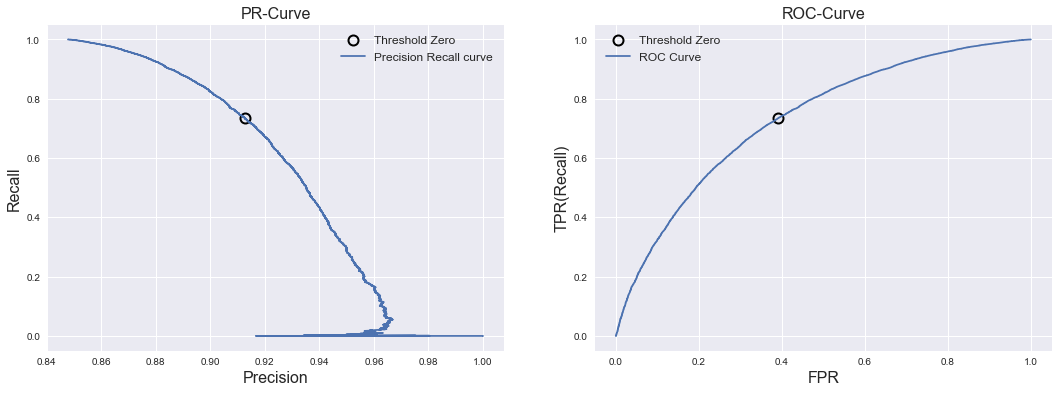

In [110]:
# plot RO Curve
plt.figure(figsize=(18, 6))
plt.subplot(1,2,2)
plt.plot(fpr_lr_clf[close_0_roc], tpr_lr_clf[close_0_roc], 'o', markersize=10, label="Threshold Zero",
        fillstyle="none", c='k', mew=2)
plt.plot(fpr_lr_clf, tpr_lr_clf, label="ROC Curve")
plt.title("ROC-Curve", fontsize=16)
plt.xlabel("FPR", fontsize=16)
plt.ylabel("TPR(Recall)", fontsize=16)
plt.legend(loc="best", fontsize=12)

# plot PR-Curve
plt.subplot(1,2,1)
plt.plot(precision_lr_clf[close_0_pr], recall_lr_clf[close_0_pr], 'o', markersize=10, label="Threshold Zero",
        fillstyle="none", c='k', mew=2)
plt.plot(precision_lr_clf, recall_lr_clf, label="Precision Recall curve")
plt.title("PR-Curve", fontsize=16)
plt.xlabel("Precision", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.show()

In [57]:
# confusion Matrix: cm_lr_clf
cm_lr_clf = confusion_matrix(y_test, y_pred_lr_clf)
print("The Confusion Matrix for LogisticRegression:\n",cm_lr_clf )

The Confusion Matrix for LogisticRegression:
 [[ 6761  4333]
 [16418 45320]]


In [58]:
# print classification report
print(classification_report(y_test, y_pred_lr_clf))

             precision    recall  f1-score   support

          0       0.29      0.61      0.39     11094
          1       0.91      0.73      0.81     61738

avg / total       0.82      0.72      0.75     72832



In [96]:
# print ROC AUC acore for the model.
roc_auc_lr_clf = roc_auc_score(y_test, lr_clf.decision_function(X_test))
print("The ROC AUC Sore:", roc_auc_lr_clf)

The ROC AUC Sore: 0.732563363492


In [99]:
# calculation of average precision value: ap_lr_clf
ap_lr_clf = average_precision_score(y_test, lr_clf.decision_function(X_test))
print("Average Precision for LogisticRegression:", ap_lr_clf)

Average Precision for LogisticRegression: 0.929040869787


In [156]:
# Calculate the f1_score for the Linear model: f1_score_lr_clf
f1_score_lr_clf = f1_score(y_test, y_pred_lr_clf)
print("The f1 score for the LosgisticRegression model:", f1_score_lr_clf)

The f1 score for the LosgisticRegression model: 0.813710263845


**Obeservations:** <br>
   * As per the confusion matrix, the model was able to classify total of **52081** records correctly, which is like 72% correct prediction.
   * Each point along the curve in **precision_recall_curve** corresponds to a possible threshold on the decision_function. We can see for example that we can achieve a recall of 0.4 at a precision of about 0.94. The black circle marks the point that corresponds to a threshold of zero, the default threshold for decision_function. This point is the trade-off that is chosen when calling the predict method.
   * One particular way to summarize the precision-recall curve by computing the integral or area under the curve of the precision-recall curve, also known as **average precision**, which is 0.929 for our model. Because average precision is the area under a curve that goes from 0 to 1, average precision always returns a value between 0 (worst) and 1 (best). The average precision of a classifier that assigns decision_function at random is the fraction of positive samples in the dataset.
   * For the **ROC curve**, the ideal curve is close to the top left: you want a classifier that produces a high recall while keeping a low false positive rate. Compared to the default threshold of zero, the curve shows that we could achieve a significant higher recall (around 0.9) while only increasing the FPR slightly. The point closes to the top left might be a better operating point than the one chosen by default.
   * As for the precision-recall curve, we often want to summarize the ROC curve using a single number, the area under the curve. Often the **area under the ROC-curve** is just called **AUC** (area under the curve) and it is understood that the curve in question is the ROC curve. We can compute the area under the ROC curve using the roc_auc_score function. In our case this is .732


### 2.2. MultinomialNB - Naive Bayes Classification ###
Our second model is Naive Bayes Classifier. Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed above. However, they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than linear classifiers. The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually, and collect simple per-class statistics from each feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn, GaussianNB, BernoulliNB and MultinomialNB. We will be using **MultinomialNB**.

In [66]:
# set the parameter which affects the model, for Naive Bayes it is alpha: param_grid
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10]}

# Initiate the model with the GridSearchCV: mnb
mnb = GridSearchCV(MultinomialNB(), param_grid, cv=sss)

In [67]:
# train the model 
mnb.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.25,
            train_size=None),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
# print best parameter and best score
print("Best parameter:", mnb.best_params_)
print("Best score:", mnb.best_score_)

Best parameter: {'alpha': 0.001}
Best score: 0.563432964755


In [69]:
# results converted into dataframes for detailed insight: mnb_results
mnb_results = pd.DataFrame(mnb.cv_results_)
mnb_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.140570,0.051459,0.563433,0.565270,0.001,{'alpha': 0.001},1,0.563817,0.566603,0.563601,0.565315,0.570685,0.568374,0.556885,0.562291,0.562176,0.563767,0.728053,0.003561,0.004410,0.002124
1,0.667336,0.039889,0.563433,0.565270,0.01,{'alpha': 0.01},1,0.563817,0.566603,0.563601,0.565315,0.570685,0.568374,0.556885,0.562291,0.562176,0.563767,0.006527,0.000072,0.004410,0.002124
2,0.683699,0.041539,0.563433,0.565267,0.1,{'alpha': 0.1},1,0.563796,0.566603,0.563601,0.565315,0.570685,0.568360,0.556907,0.562291,0.562176,0.563767,0.019143,0.001688,0.004403,0.002119
3,0.699975,0.041673,0.563411,0.565247,1,{'alpha': 1},4,0.563774,0.566560,0.563537,0.565308,0.570685,0.568353,0.556863,0.562241,0.562198,0.563774,0.043072,0.001401,0.004414,0.002125
4,0.679255,0.042805,0.563252,0.565116,10,{'alpha': 10},5,0.563601,0.566416,0.563321,0.565207,0.570577,0.568194,0.556604,0.562147,0.562154,0.563616,0.016624,0.001571,0.004454,0.002109


If we look at the mean test/train score we can see that the alpha at 0.001, 0.01 and 0.1 are almost same. GridSearchCV has choosen alpha=0.001. The scores are not very good actually its bad. However let's see the model's performance on the test data.

In [70]:
# prediction using the test data: y_pred_mnb
y_pred_mnb = mnb.predict(X_test)

### Model Evaluation ####
#### PR-Curve Vs ROC-Curve  - MultinomialNB####

In [74]:
# calculate precision, recall and thresholds: precision_mnb, recall_mnb, thresholds_mnb
precision_mnb, recall_mnb, thresholds_mnb = precision_recall_curve(y_test, mnb.predict_proba(X_test)[:,1])

# find threshold close to 0: close_0_mnb
close_0_mnb = np.argmin(np.abs(thresholds_mnb))

# calculate fpr(flase positive rate), tpr(true positive rate) and thresholds: fpr_mnb, tpr_mnb, th_mnb 
fpr_mnb, tpr_mnb, th_mnb = roc_curve(y_test, mnb.predict_proba(X_test)[:,1])

# find threshold close to 0: close_0_roc_mnb 
close_0_roc_mnb = np.argmin(np.abs(th_mnb))

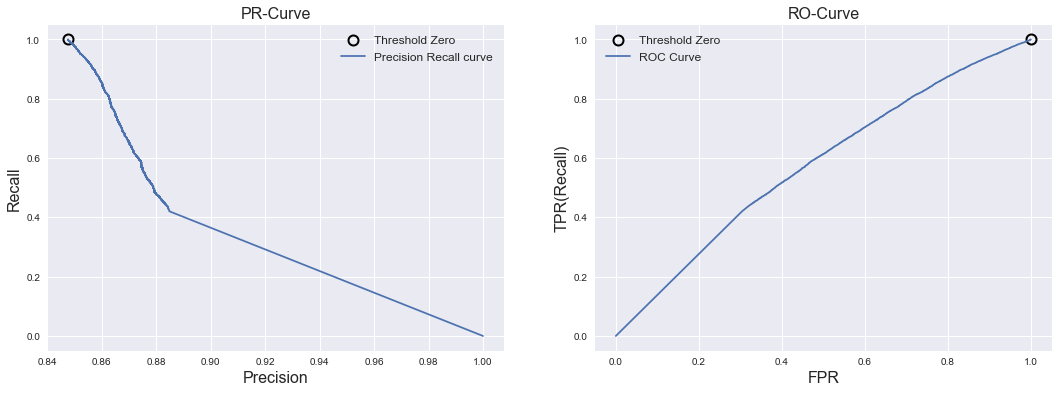

In [109]:
plt.figure(figsize=(18, 6))

# plot PR-Curve
plt.subplot(1,2,1)
plt.plot(precision_mnb[close_0_mnb], recall_mnb[close_0_mnb], 'o',
         markersize=10, label="Threshold Zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_mnb, recall_mnb, label="Precision Recall curve")
plt.title("PR-Curve", fontsize=16)
plt.xlabel("Precision", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.legend(loc="best", fontsize=12)

# plot PR-Curve
plt.subplot(1,2,2)
plt.plot(fpr_mnb[close_0_roc_mnb], tpr_mnb[close_0_roc_mnb],
         'o', markersize=10, label="Threshold Zero", fillstyle="none", c='k', mew=2)
plt.plot(fpr_mnb, tpr_mnb, label="ROC Curve")
plt.title("RO-Curve", fontsize=16)
plt.xlabel("FPR", fontsize=16)
plt.ylabel("TPR(Recall)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.show()

In [72]:
# confusion Matrix: cm_mnb
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

print("The confusion matrix for Naive Bayes Multinomial classifier:\n", cm_mnb)

The confusion matrix for Naive Bayes Multinomial classifier:
 [[ 6415  4679]
 [28581 33157]]


In [73]:
# Classification Report
print(classification_report(y_test, y_pred_mnb))

             precision    recall  f1-score   support

          0       0.18      0.58      0.28     11094
          1       0.88      0.54      0.67     61738

avg / total       0.77      0.54      0.61     72832



In [101]:
# calculate and print average precision score: ap_mnb
ap_mnb = average_precision_score(y_test, mnb.predict_proba(X_test)[:,1])
print("The average Precision score for MultinomialNB is:", ap_mnb)

The average Precision score for MultinomialNB is: 0.874624917163


In [88]:
# print ROC AUC acore for the model.
roc_auc_mnb = roc_auc_score(y_test, mnb.predict_proba(X_test)[:,1])
print("The ROC AUC Sore:", roc_auc_mnb)

The ROC AUC Sore: 0.577770717454


In [166]:
# calculate the f1 score for Naive Bayes model: f1_mnb
f1_mnb = f1_score(y_test, y_pred_mnb)
print("The f1-score for MultinomialNB model is:",f1_mnb)

The f1-score for MultinomialNB model is: 0.665977062285


**Observations**:
 * As per the confusion matrix the total number of correct prediction is  **39572** which is only around 55%.
 * The PR-Curve and the ROC curve looks very bad. The f1-score is less than .60 whici is considered to be very bad.
 * It looks like this model is not better than the Linear Model LogisticRegression(). Let's now take a look at Decision Tree. And will directly move to random forest becuase ensable give better result than simple tree.
 * The average pricision score is lesser than that of LogisticRegression, same is the case with ROC AUC score.

### 2.3. RandomForestClassifier ###
A main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem. Random forests are essentially a collection of decision trees, where each tree is slightly different from the others. The idea of random forests is that each tree might do a relatively good job of predicting,
but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics.

Using GridSearchCV for the RandomForestClassifier for this big dataset, the training is taking more than 4hrs to complete. Hence for RandomForestClassifier I will be setting these **hyperparameter** manually and will compare the three different models.

There are two hyperparameters of our interest here, **n_estimators** and **max_depth**

In [77]:
# setting n_estimators = 5 and max depth = 100: rf_clf5
rf_clf5 = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1)

# train the model
rf_clf5.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
# predict the test data: y_pred_rf5
y_pred_rf5 = rf_clf5.predict(X_test)

In [79]:
# print classification report which has summary for precision, recall and f1 score.
print(classification_report(y_test, y_pred_rf5))

             precision    recall  f1-score   support

          0       0.25      0.22      0.24     11094
          1       0.86      0.88      0.87     61738

avg / total       0.77      0.78      0.77     72832



In [80]:
# setting n_estimators = 10 and max depth = 100: rf_clf10
rf_clf10 = RandomForestClassifier(n_estimators=10, max_depth=100, n_jobs=-1)

# train the model
rf_clf10.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
# predict the test data: y_pred_rf10
y_pred_rf10 = rf_clf10.predict(X_test)

In [84]:
# print classification report which has summary for precision, recall and f1 score.
print(classification_report(y_test, y_pred_rf10))

             precision    recall  f1-score   support

          0       0.27      0.24      0.25     11094
          1       0.87      0.88      0.87     61738

avg / total       0.77      0.78      0.78     72832



As we can see the f1-score is almost same for n_estimators 5 and 10. Now we will build the model with n_estimators = 100 and check what is the improvement in the f1-score.

In [85]:
# setting n_estimators = 5 and max depth = 100: rf_clf5
rf_clf100 = RandomForestClassifier(n_estimators=100, max_depth=100, n_jobs=-1)

# train the model
rf_clf100.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
# predict the test data: y_pred_rf5
y_pred_rf100 = rf_clf100.predict(X_test)

### Model Evaluation ####
#### PR-Curve Vs ROC-Curve - RandomForestClassifier ####

In [91]:
# calculate precision, recall and thresholds: precision_rf100, recall_rf100, thresholds_rf100
precision_rf100, recall_rf100, thresholds_rf100 = precision_recall_curve(y_test, rf_clf100.predict_proba(X_test)[:,1])

# find threshold close to 0: close_0_rf100
close_0_rf100 = np.argmin(np.abs(thresholds_rf100))

# calculate fpr(flase positive rate), tpr(true positive rate) and thresholds: fpr_rf100, tpr_rf100, th_rf100
fpr_rf100, tpr_rf100, th_rf100 = roc_curve(y_test, rf_clf100.predict_proba(X_test)[:,1])

# find threshold close to 0: close_0_roc_rf100 
close_0_roc_rf100 = np.argmin(np.abs(th_rf100))

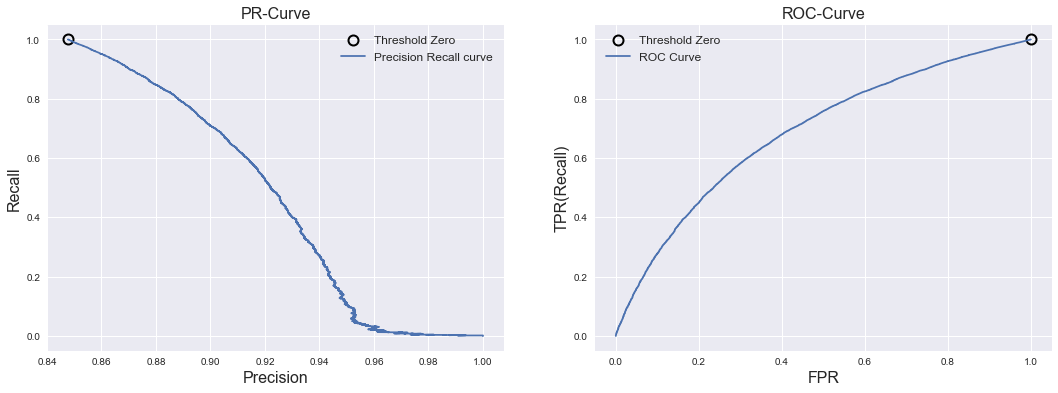

In [108]:
plt.figure(figsize=(18, 6))

# plot PR-Curve
plt.subplot(1,2,1)
plt.plot(precision_rf100[close_0_rf100], recall_rf100[close_0_rf100], 'o',
         markersize=10, label="Threshold Zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf100, recall_rf100, label="Precision Recall curve")
plt.title("PR-Curve", fontsize=16)
plt.xlabel("Precision", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.legend(loc="best", fontsize=12)

# plot PR-Curve
plt.subplot(1,2,2)
plt.plot(fpr_rf100[close_0_roc_rf100], tpr_rf100[close_0_roc_rf100],
         'o', markersize=10, label="Threshold Zero", fillstyle="none", c='k', mew=2)
plt.plot(fpr_rf100, tpr_rf100, label="ROC Curve")
plt.title("ROC-Curve", fontsize=16)
plt.xlabel("FPR", fontsize=16)
plt.ylabel("TPR(Recall)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.show()

In [153]:
cm_rf100 = confusion_matrix(y_test, y_pred_rf100)
print("The confusion matrix for Random Forest:\n", cm_rf100)

The confusion matrix for Random Forest:
 [[ 1192  9902]
 [ 2315 59423]]


In [87]:
# print classification report which has summary for precision, recall and f1 score.
print(classification_report(y_test, y_pred_rf100))

             precision    recall  f1-score   support

          0       0.34      0.11      0.16     11094
          1       0.86      0.96      0.91     61738

avg / total       0.78      0.83      0.79     72832



In [103]:
# calulate the average precision score for random forest: ap_rf100
ap_rf100 = average_precision_score(y_test, rf_clf100.predict_proba(X_test)[:,1])
print("The average precision score for RandomForest is:", ap_rf100)

The average precision score for RandomForest is: 0.916630708901


In [94]:
# print ROC AUC acore for the model.
roc_auc_rf100 = roc_auc_score(y_test, rf_clf100.predict_proba(X_test)[:,1])
print("The ROC AUC Sore:", roc_auc_rf100)

The ROC AUC Sore: 0.686824206735


In [157]:
f1_score_rf100 = f1_score(y_test, y_pred_rf100)
print("The f1 score for the RandomForest model:", f1_score_rf100)

The f1 score for the RandomForest model: 0.906785286465


**Observations**
* This model is definitely better than the Naive Bayes, but looks similar to Linear Model.
* The average precision score is quite good at .916 where as the ROC AUC score is 0.689 which is lesser than the Linear model.
* From confusion matrix we can see that almost 83% of records were classified correctly. Which is better than other two models.

Since Linear and Decision Tree models are looking similar in performance we will comapre only **LogisticRegression** and **RandomForest** models and then choose one for the final prediction on real data. The best way to do this would be  plotting them together and comparing the two scores, average precision and ROC AUC scores. Lets start with the plot.

### Comparison between LogisticRegression and RondomForest ###

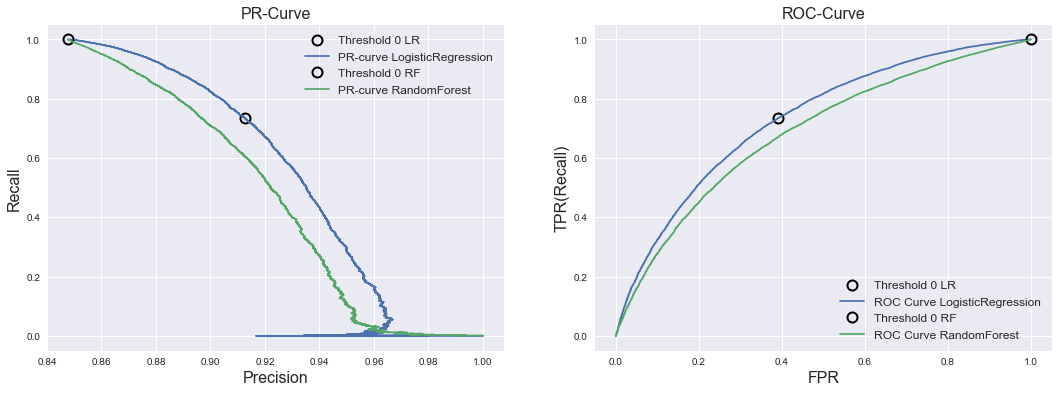

In [112]:
# Plot the two curves PR and ROC together for both the models.
plt.figure(figsize=(18, 6))
plt.subplot(1,2,2)

plt.plot(fpr_lr_clf[close_0_roc], tpr_lr_clf[close_0_roc], 'o', markersize=10, label="Threshold 0 LR",
        fillstyle="none", c='k', mew=2)
plt.plot(fpr_lr_clf, tpr_lr_clf, label="ROC Curve LogisticRegression")

plt.plot(fpr_rf100[close_0_roc_rf100], tpr_rf100[close_0_roc_rf100],
         'o', markersize=10, label="Threshold 0 RF", fillstyle="none", c='k', mew=2)
plt.plot(fpr_rf100, tpr_rf100, label="ROC Curve RandomForest")

plt.title("ROC-Curve", fontsize=16)
plt.xlabel("FPR", fontsize=16)
plt.ylabel("TPR(Recall)", fontsize=16)
plt.legend(loc="best", fontsize=12)

# plot PR-Curve
plt.subplot(1,2,1)

plt.plot(precision_lr_clf[close_0_pr], recall_lr_clf[close_0_pr], 'o', markersize=10,
         label="Threshold 0 LR", fillstyle="none", c='k', mew=2)
plt.plot(precision_lr_clf, recall_lr_clf, label="PR-curve LogisticRegression")

plt.plot(precision_rf100[close_0_rf100], recall_rf100[close_0_rf100], 'o',
         markersize=10, label="Threshold 0 RF", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf100, recall_rf100, label="PR-curve RandomForest")

plt.title("PR-Curve", fontsize=16)
plt.xlabel("Precision", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.show()

Clearly **Logistic Model** is better for the dataset. Let's check out the scores to confirm the above visualization.

In [130]:
# stores the roc, average precision and f1 scores in 3 seperate list: scores_ROC_AUC, scores_avg_precision, scores_f1
scores_ROC_AUC = [roc_auc_lr_clf, roc_auc_rf100]
scores_avg_precision = [ap_lr_clf, ap_rf100]
scores_f1 = [f1_score_lr_clf, f1_score_rf100]

[0.7325633634921821, 0.68682420673536815]

In [ ]:
# list of model name: model_name
model_name = ['LR', 'RF']
model_name

In [140]:
# convert list in to pandas dataframe: df_roc, df_ap, df_f1
df_roc = pd.DataFrame(np.array(scores_ROC_AUC).reshape(1,2), columns = model_name)
df_ap = pd.DataFrame(np.array(scores_avg_precision).reshape(1,2), columns = model_name)
df_f1 = pd.DataFrame(np.array(scores_f1).reshape(1,2), columns = model_name)

In [161]:
# Concat 3 dataframes into one Dataframe: df_scores
df_scores = pd.concat([df_roc, df_ap, df_f1]).reset_index()

In [162]:
df_scores.head()

,index,LR,RF
0,0,0.732563,0.686824
1,0,0.929041,0.916631
2,0,0.813710,0.906785


In [163]:
# dopr the extra column from the dataframe
df_scores.drop('index', inplace=True, axis=1)

In [164]:
# insert the column of score names in the score dataframe. Print the dataframe.
score_name = ['ROC-AUC', 'AVG-Precision', 'F1-Score']
df_scores['score_name']  = score_name
df_scores = df_scores.set_index('score_name')
df_scores.head()

,LR,RF
score_name,,
ROC-AUC,0.732563,0.686824
AVG-Precision,0.929041,0.916631
F1-Score,0.813710,0.906785


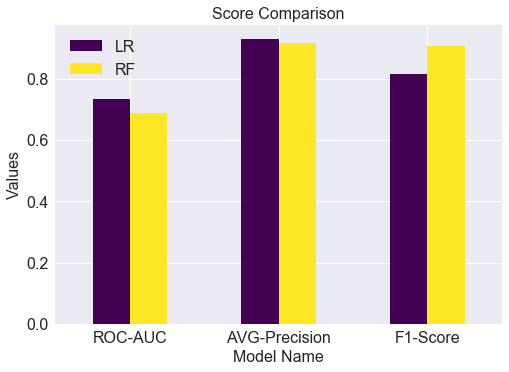

In [165]:
# Bar Plot for better comparison of the two models.
plt.figure(figsize=(15, 8))
df_scores.plot.bar(cmap = 'viridis', fontsize=16, rot=360)
plt.title("Score Comparison",fontsize=16 )
plt.xlabel("Model Name", fontsize=16)
plt.ylabel("Values", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.show()

So we have **LogisticRegression (LR)** model, which has better **ROC-AUC** and **Average Precision Score**. On the Other hand **RandomForest (RF)** has better **F1-Score** and __Confusion Matrix__ tells that the number of correct prediction is better than the **LR** model. Hence we will be using both this models to predict the real test data.

### Prediction on Real test dataset ###
** LogisticRegression **

In [169]:
# predict the real test data using lr_clf model: y_real_pred_lr_clf
y_real_pred_lr_clf = lr_clf.predict(X_test_real)

In [182]:
# convert this array into a dataframe: df_real_test_lr
df_real_test_lr = pd.DataFrame(y_real_pred_lr_clf, columns=['LR_project_is_approved'])
df_real_test_lr.head(5)

,LR_project_is_approved
0,1
1,1
2,1
3,1
4,1


In [173]:
# predict probability of each record used for classification: predict_prob_lr_clf
predict_prob_lr_clf = lr_clf.predict_proba(X_test_real)

In [176]:
# convert this predicted array into dataframe: df_pred_prob_lr
df_pred_prob_lr = pd.DataFrame(predict_prob_lr_clf, columns=['lr_prob_0','lr_prob_1'])
df_pred_prob_lr.head()

,lr_prob_0,lr_prob_1
0,0.108543,0.891457
1,0.313021,0.686979
2,0.019911,0.980089
3,0.088736,0.911264
4,0.166454,0.833546


### Prediction on Real test dataset ###
** RandomForest **

In [177]:
# predict the real test data using rf_clf100 model: y_real_pred_rf
y_real_pred_rf = rf_clf100.predict(X_test_real)

In [179]:
# convert this prediction array into a dataframe: df_real_test_rf
df_real_test_rf = pd.DataFrame(y_real_pred_rf, columns=['RF_project_is_approved'])
df_real_test_rf.head(5)

,RF_project_is_approved
0,1
1,1
2,1
3,1
4,1


In [180]:
# predict probability of each record used for classification: predict_prob_rf
predict_prob_rf = rf_clf100.predict_proba(X_test_real)

In [181]:
# convert this predicted array into dataframe: df_pred_prob_lr
df_pred_prob_rf = pd.DataFrame(predict_prob_rf, columns=['rf_prob_0','rf_prob_1'])
df_pred_prob_rf.head()

,rf_prob_0,rf_prob_1
0,0.188942,0.811058
1,0.209209,0.790791
2,0.119166,0.880834
3,0.222361,0.777639
4,0.150524,0.849476


So we have 4 dataframes now, each model's classification prediction and probabilities associated with it. We will merge these 4 dataframes. This will help to compare each record for the predicted class and the probabilities.

In [185]:
# merge the 4 dataframes into one: df_real_test
df_real_test = pd.concat([df_pred_prob_lr, df_real_test_lr, df_pred_prob_rf, df_real_test_rf], axis=1)
df_real_test.head()

,lr_prob_0,lr_prob_1,LR_project_is_approved,rf_prob_0,rf_prob_1,RF_project_is_approved
0,0.108543,0.891457,1,0.188942,0.811058,1
1,0.313021,0.686979,1,0.209209,0.790791,1
2,0.019911,0.980089,1,0.119166,0.880834,1
3,0.088736,0.911264,1,0.222361,0.777639,1
4,0.166454,0.833546,1,0.150524,0.849476,1


In [198]:
# we also have the project id dataframe as well, so we will merge into the df_real_test
df_real_test.insert(loc=0, column='id',  value=test_id['id'])

In [199]:
# print few rows from the final dataframe.
df_real_test.head(5)

,id,lr_prob_0,lr_prob_1,LR_project_is_approved,rf_prob_0,rf_prob_1,RF_project_is_approved
0,p233245,0.108543,0.891457,1,0.188942,0.811058,1
1,p096795,0.313021,0.686979,1,0.209209,0.790791,1
2,p236235,0.019911,0.980089,1,0.119166,0.880834,1
3,p233680,0.088736,0.911264,1,0.222361,0.777639,1
4,p171879,0.166454,0.833546,1,0.150524,0.849476,1


So we have the final dataframe, which can be transformed into any desired format for submission. Also we can **increase/decrease** the threshold for the probability class for better screening. For example if the appications submitted to the DonorsChoose.org are more, they can increase the probability threshold of "approved or 1" class from default .5 to something like .6 or .65, to regulate the number of project proposals so that volunteers can spend time on really good propsals which has more chances of getting approval and get to be posted on **DonorsChoose.org**

----------------------------------------------------------------------------------------------------------------------